In [319]:
import hvplot.pandas
import pandas as pd
import requests
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
year = 2022

In [320]:
df = pd.read_csv(f"tmdb_movie_final_{year}_budgets.csv")
plt.rcParams.update({"font.size":9})

In [321]:
df.head()

,Unnamed: 0,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,...,title,video,vote_average,vote_count,Budget,Revenue,Country,Genres,imdb_id,year
0,0,False,/bQXAqRx2Fgc46uCVWgoPz5L5Dtr.jpg,"[28, 14, 878]",436270,en,Black Adam,"Nearly 5,000 years after he was bestowed with ...",6579.615,/pFlaoHTZeyNkG83vxsAJiGzfSsa.jpg,...,Black Adam,False,7.3,2508,200000000.0,384571691.0,United States of America,Action,tt6443346,2022
1,1,False,/7zQJYV02yehWrQN6NjKsBorqUUS.jpg,"[28, 18, 36]",724495,en,The Woman King,"The story of the Agojie, the all-female unit o...",3881.892,/438QXt1E3WJWb3PqNniK0tAE5c1.jpg,...,The Woman King,False,7.9,615,50000000.0,91000000.0,Canada,Action,tt8093700,2022
2,2,False,/kmzppWh7ljL6K9fXW72bPN3gKwu.jpg,"[14, 28, 35, 80]",1013860,en,R.I.P.D. 2: Rise of the Damned,When Sheriff Roy Pulsipher finds himself in th...,2530.599,/g4yJTzMtOBUTAR2Qnmj8TYIcFVq.jpg,...,R.I.P.D. 2: Rise of the Damned,False,6.7,207,130.0,78324220.0,United States of America,Fantasy,tt21094994,2022
3,3,False,/xDMIl84Qo5Tsu62c9DGWhmPI67A.jpg,"[28, 12, 878]",505642,en,Black Panther: Wakanda Forever,"Queen Ramonda, Shuri, M’Baku, Okoye and the Do...",1798.687,/ps2oKfhY6DL3alynlSqY97gHSsg.jpg,...,Black Panther: Wakanda Forever,False,7.5,1213,250000000.0,733000000.0,United States of America,Action,tt9114286,2022
4,4,False,/au4HUSWDRadIcl9CqySlw1kJMfo.jpg,"[80, 28, 53]",829799,en,Paradise City,Renegade bounty hunter Ryan Swan must carve hi...,1796.896,/xdmmd437QdjcCls8yCQxrH5YYM4.jpg,...,Paradise City,False,6.3,40,20000000.0,0.0,United States of America,Crime,tt14656632,2022


In [322]:
data = df[["popularity","vote_average","vote_count", "Revenue","Country","Genres", "Budget" ]].copy()

In [323]:
data.head()
data.dropna()

,popularity,vote_average,vote_count,Revenue,Country,Genres,Budget
0,6579.615,7.3,2508,384571691.0,United States of America,Action,200000000.0
1,3881.892,7.9,615,91000000.0,Canada,Action,50000000.0
2,2530.599,6.7,207,78324220.0,United States of America,Fantasy,130.0
3,1798.687,7.5,1213,733000000.0,United States of America,Action,250000000.0
4,1796.896,6.3,40,0.0,United States of America,Crime,20000000.0
...,...,...,...,...,...,...,...
3259,1.873,3.0,2,0.0,United States of America,Horror,200000.0
3260,1.872,0.0,0,316420.0,United States of America,Animation,0.0
3261,1.869,0.0,0,0.0,Germany,Documentary,3.0
3262,1.869,7.2,18,185973.0,United Kingdom,Documentary,0.0


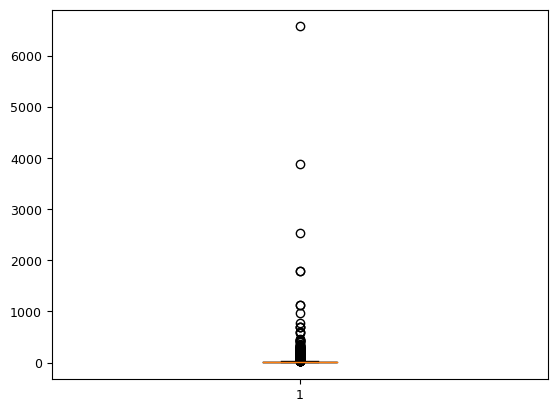

,popularity,vote_average,vote_count,Revenue,Country,Genres,Budget
380,39.134,6.2,3077,102952888.0,United States of America,Horror,10000000.0
381,39.038,6.4,2595,67200000.0,China,Action,33000000.0
383,38.774,6.8,1998,39657073.0,South Korea,Action,17000000.0
384,38.648,8.0,15219,894027543.0,United Kingdom,Music,52000000.0
385,38.542,6.6,4918,306515884.0,United States of America,Horror,15000000.0


In [324]:
pop = data["popularity"]
quartiles = pop.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
fig1, ax1 = plt.subplots()
ax1.boxplot(pop)
plt.show()
outliers = data.loc[(data["popularity"]<=lower_bound) | (data["popularity"]>=upper_bound)]
filtered = data.loc[(data["popularity"]>=lower_bound) & (data["popularity"]<=upper_bound) & (data["Budget"]!=0)\
                                                                                 & (data["Revenue"]!=0),:]
outliers.count()
filtered.head()

In [325]:
sorted_data = filtered.sort_values("popularity", ascending=False)
sorted_data.head()

,popularity,vote_average,vote_count,Revenue,Country,Genres,Budget
380,39.134,6.2,3077,102952888.0,United States of America,Horror,10000000.0
381,39.038,6.4,2595,67200000.0,China,Action,33000000.0
383,38.774,6.8,1998,39657073.0,South Korea,Action,17000000.0
384,38.648,8.0,15219,894027543.0,United Kingdom,Music,52000000.0
385,38.542,6.6,4918,306515884.0,United States of America,Horror,15000000.0


In [326]:
country = sorted_data.groupby(by = ["Country"], as_index = False).sum()
country = country.sort_values("popularity", ascending=False)
country = country.head(20)


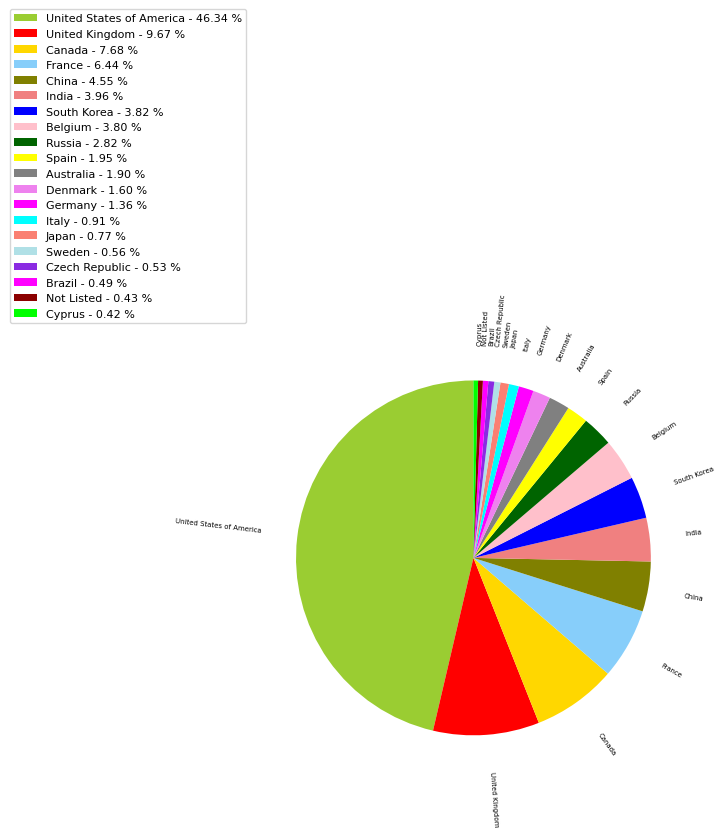

In [327]:
x = country["Country"]
y = country["popularity"]
colors = ['yellowgreen','red','gold','lightskyblue','olive','lightcoral','blue','pink',\
          'darkgreen','yellow','grey','violet','magenta','cyan', 'salmon', 'powderblue', 'blueviolet', 'fuchsia',\
         'darkred', 'lime', 'cornflowerblue']
percent = (100.0*y)/(y.sum())

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2, labels = x, rotatelabels = 90, labeldistance= 1.2,\
                         textprops={'fontsize': 5})
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 2),
           fontsize=8)

plt.savefig(f"country_{year}.png", bbox_inches='tight')
plt.show()
plt.rcParams.update({"font.size":9})

In [328]:
genre = sorted_data.groupby(["Genres"]).count()
genre = genre.sort_values(by = ["popularity"], ascending= False)
genre.head()

,popularity,vote_average,vote_count,Revenue,Country,Budget
Genres,,,,,,
Drama,191,191,191,191,191,191
Comedy,146,146,146,146,146,146
Action,115,115,115,115,115,115
Horror,59,59,59,59,59,59
Crime,40,40,40,40,40,40


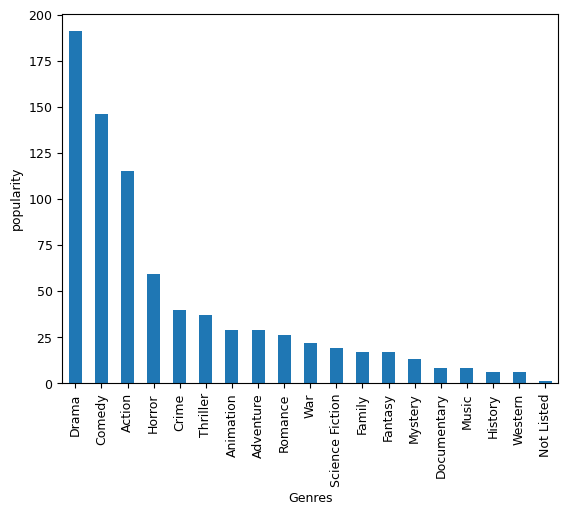

In [329]:
genre.apply(["popularity"], axis=1).plot(kind="bar", legend=False)
plt.ylabel('popularity')
textprops={'fontsize': 12}
plt.savefig(f"Genres_{year}.png", bbox_inches = 'tight')

In [268]:
budget = filtered.sort_values("Budget")
budget.head(20)

,popularity,vote_average,vote_count,Revenue,Country,Genres,Budget
2428,2.623,6.3,8,24,United States of America,Action,1
2997,1.546,0.0,0,20,United States of America,Fantasy,50
2583,2.249,5.1,4,110000,United States of America,Comedy,300
2733,1.937,6.8,8,7436000,Vietnam,Drama,528
2725,1.946,7.8,7,10000,India,Comedy,1000
1784,5.979,6.9,39,5000,Peru,Comedy,5000
2624,2.165,2.7,3,4,United States of America,Animation,5000
3027,1.510,0.0,0,10000,Not Listed,Animation,10000
2465,2.515,7.3,14,100000,Romania,Comedy,11000
2526,2.368,5.2,16,230258,Spain,Comedy,11203


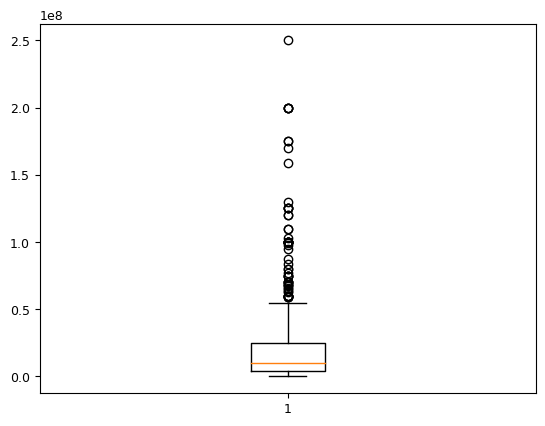

popularity      59
vote_average    59
vote_count      59
Revenue         59
Country         59
Genres          59
Budget          59
dtype: int64

In [263]:
bud = budget["Budget"]
quartiles = bud.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
fig1, ax1 = plt.subplots()
ax1.boxplot(bud)
plt.show()
outliers = budget.loc[(budget["Budget"]<=lower_bound) | (budget["Budget"]>=upper_bound)]
budget = budget.loc[(budget["Budget"]>=lower_bound) & (budget["Budget"]<=upper_bound),:]
outliers.count()

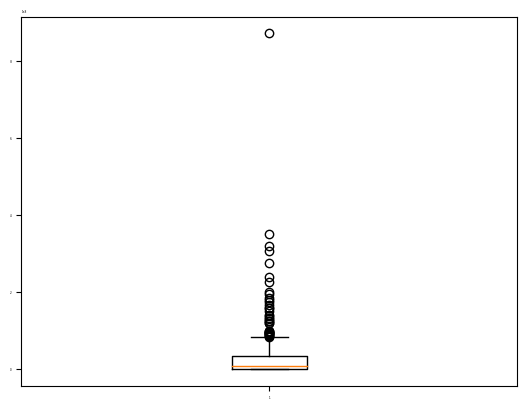

popularity      37
vote_average    37
vote_count      37
Revenue         37
Country         37
Genres          37
Budget          37
dtype: int64

In [188]:
bud = budget["Revenue"]
quartiles = bud.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
fig1, ax1 = plt.subplots()
ax1.boxplot(bud)
plt.show()
outliers = budget.loc[(budget["Revenue"]<=lower_bound) | (budget["Revenue"]>=upper_bound)]
budget = budget.loc[(budget["Revenue"]>=lower_bound) & (budget["Revenue"]<=upper_bound),:]
outliers.count()

The correlation between both factors is 0.52
The r-squared is: 0.2707162281422917


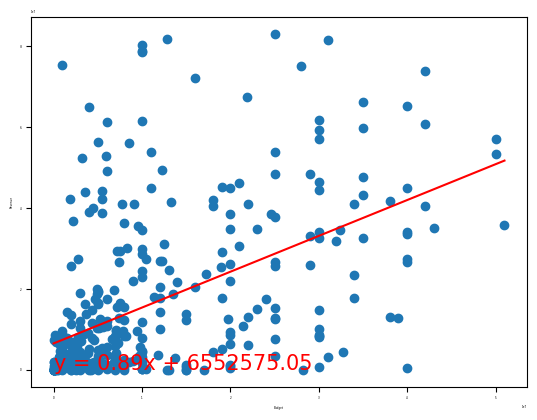

In [189]:
# Add the linear regression equation and line to plot
x_values = budget["Budget"]
y_values = budget["Revenue"]
correlation = st.pearsonr(budget["Budget"],budget["Revenue"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Budget')
plt.ylabel('Revenue')
correlation = st.pearsonr(budget["Budget"],budget["Revenue"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The correlation between both factors is 0.48
The r-squared is: 0.22685973269231682


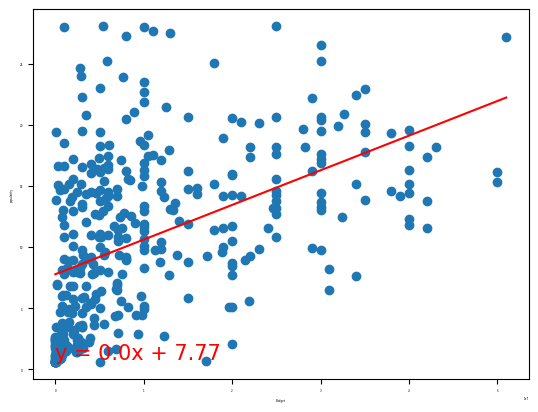

In [190]:
x_values = budget["Budget"]
y_values = budget["popularity"]
correlation = st.pearsonr(budget["Budget"],budget["popularity"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Budget')
plt.ylabel('popularity')
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
plt.show()